# Graphs

## Basic Theory
A graph is an abstract data structure that is used to represent and model certain types of data relationships.

A graph contains:
- Vertices (or nodes)
- Edges, which connect vertices

A vertex represents some element, while an edge represent a form of relationship between two elements

An intuitive example would be to represent a social network of people as a graph:
- Each person would be a node on the graph
- An edge between two people would represent a social connection between them (i.e. they know each other)

Edges can have weights, or be weightless. Additionally, edges may be directed (implying an asymmetrical relationship between the vertices), or undirected.

- A node's *degree* is the number of edges the node has. It represents how many connections a node has to other nodes in the graph.

- A *Loop* is an edge from a node to itself.

- A *Path* is a sequence of at least 2 nodes in the graph, where there is an edge between each node and the node that precedes it in the sequence.

- A *Cycle* is a path with the same starting and ending nodes. i.e. a path through a graph that starts and ends at the same node.

- A *Simple Graph* is an undirected, unweighted graph containing no loops, and no more than one edge between any two vertices (i.e. no duplicate edges).

- A *Regular Graph* is a graph where every node has the same degree

- A *Complete Graph* is a graph where every pair of nodes has an edge between them. If every pair of nodes has an edge between them, then every node in the graph is connected to every other node. Thus all nodes have the same degree (as they're all connected to *N-1* nodes, where *N* is the total number of nodes in the graph). Thus a complete graph must be regular.

###### Applying Graphs to Real-World Problems
Graphs and graph algorithms can be very useful for solving a variety of real-world problems if applied properly. The steps for applying graphs to a problem are:
1. **Reduce** a real-world problem into an instance of a graph problem
2. **Apply** a graph algorithm to compute the result efficiently
3. **Interpret** the result of the computation in terms of a solution to the original problem

## Implementing Graphs
Graphs can be implemented easily in Python using a dictionary of dictionaries.

Before implementing graphs, a basic implementation of vertices and edges would be convenient:

In [1]:
class Vertex(object):
    """A Vertex is a node in a graph."""

    label = ''

    def __init__(self, label=''):
        self.label = label

    def __repr__(self):
        """Returns a string representation of this object that can
        be evaluated as a Python expression."""
        return 'Vertex(%s)' % repr(self.label)

    __str__ = __repr__
    """The str and repr forms of this object are the same."""

    def getLabel(self):
        return self.label


class Edge(tuple):
    """An Edge is a list of two vertices."""

    def __new__(cls, *vs):
        """The Edge constructor takes two vertices."""
        if len(vs) != 2:
            raise ValueError, 'Edges must connect exactly two vertices.'
        return tuple.__new__(cls, vs)

    def __repr__(self):
        """Return a string representation of this object that can
        be evaluated as a Python expression."""
        return 'Edge(%s, %s)' % (repr(self[0]), repr(self[1]))

    __str__ = __repr__
    """The str and repr forms of this object are the same."""

Now, using these classes, a graph can be constructed very simplistically. The outer dictionary maps from a vertex to an inner dictionary. The inner dictionary maps from a vertex to an edge. The edge represents the connection between the two vertices used as keys for the two dictionaries.

Here is a basic implementation, along with many convenient methods commonly used in graph algorithms:

In [ ]:
class Graph(dict):
    """A Graph is a dictionary of dictionaries.  The outer
    dictionary maps from a vertex to an inner dictionary.
    The inner dictionary maps from other vertices to edges.

    For vertices a and b, graph[a][b] maps
    to the edge that connects a->b, if it exists."""

    def __init__(self, vs=[], es=[]):
        """Creates a new graph.
        vs: list of vertices;
        es: list of edges.
        """
        for v in vs:
            self.add_vertex(v)

        for e in es:
            self.add_edge(e)

    def add_vertex(self, v):
        """Add a vertex to the graph."""
        self[v] = {}

    def add_edge(self, e):
        """Adds and edge to the graph by adding an entry in both directions.

        If there is already an edge connecting these Vertices, the
        new edge replaces it.
        """
        v, w = e
        self[v][w] = e
        self[w][v] = e

    def get_edge(self, v1, v2):
        """Take two vertices and return the edge between them if it exists, and None otherwise"""
        try:
            return self[v1][v2]
        except KeyError:
            return False


    def remove_edge(self, e):
        """Take an edge and remove all references to it from the graph"""
        v, w = e
        try:
            del self[v][w]
            del self[w][v]
        except:
            pass

    def vertices(self):
        """Return a list of the vertices in the graph"""
        nodes = []
        for i in self.keys():
            nodes.append(i)
        return nodes

    def edges(self):
        """Return a list of the edges in the graph"""
        edge_set = set()
        for i in self.keys():
            for j in self[i].keys():
                edge_set.add(self[i][j])
        return edge_set

    def out_vertices(self, v):
        """"Method takes a vertex and returns a list of its adjacent vertices"""
        adjacentNodes = []
        try:
            for i in self[v].keys():
                adjacentNodes.append(i)
        except:
            pass
        return adjacentNodes

    def out_edges(self, v):
        """Method takes a vertex and returns a list of edges connected to it"""
        adjacentEdges = []
        try:
            for i in self[v].keys():
                adjacentEdges.append(self[v][i])
        except:
            pass
        return adjacentEdges

    def add_all_edges(self):
        """Method takes a graph with no edges, and makes it complete"""
        vertices = self.vertices() #Get all vertices
        #Loop over all vertices
        for i in range(len(vertices)):
            #Loop over all vertices again
            for j in range(len(vertices)):
                if (i == j):
                    continue
                else:
                    #Add edge between pair of vertices
                    self[vertices[i]][vertices[j]] = Edge(vertices[i], vertices[j])

    def add_regular_edges(self, degree):
        vertices = self.vertices()
        number_of_vertices = len(vertices)
        if number_of_vertices < degree + 1:
          raise ValueError('too high of a degree')
        if (number_of_vertices * degree) % 2 != 0:
          raise ValueError('n * degree must be even')

        for index in range(number_of_vertices):
          if degree % 2 == 0:
            number_of_neighbors_per_side = degree / 2
          else:
            number_of_neighbors_per_side = (degree - 1) / 2
            # and connect the vertex directly opposed to this vertex
            target_index = (index + number_of_vertices / 2) % number_of_vertices
            edge = Edge(vertices[index], vertices[target_index])
            self.add_edge(edge)
          for j in range(number_of_neighbors_per_side):
            target_index = (index + j + 1) % number_of_vertices
            edge = Edge(vertices[index], vertices[target_index])
            self.add_edge(edge)
            target_index = (index - j - 1) % number_of_vertices
            edge = Edge(vertices[index], vertices[target_index])
            self.add_edge(edge)

    def is_regular(self):
        """Checks if the graph is regular. Returns true if it is; false otherwise"""
        lastDeg = 0
        curDeg = 0
        firstIteration = True

        #Loop over all vertices in graph
        for curNode in self.keys():
            #Ensure degrees of current node and last node are the same
            if(lastDeg != curDeg):
                return False
            #Update current and last node's degrees
            lastDeg = curDeg
            curDeg = len(self[curNode])
            #Special code for first iteration
            if(firstIteration):
                firstIteration = False
                lastDeg = curDeg

        #Check very last node in graph (won't be checked in loop)
        if(lastDeg != curDeg):
                return False
        #If method hasn't returned yet, graph is regular
        return True

    def is_connected(self):
        """Checks if the graph is connected. Returns true if it is, false otherwise"""
        visited = [] #List of visited nodes
        q = [] #Queue for BFS
        vs = self.keys() #Nodes in graph
        q.append(vs[0]) #Starting node
        visited.append(vs[0]) #Visit first node

        #Perform BFS
        while(len(q) > 0):
            #Pop node off top of queue
            curNode = q.pop(0)
            #Visit any unvisited adjacent nodes, and add them to end of queue
            for i in self[curNode].keys():
                if i not in visited:
                    q.append(i)
                    visited.append(i)

        #Check if graph is connected
        if(len(visited) == len(vs)):
            return True
        else:
            return False

Some of the notable methods contained by this implementation are:
- *is_connected*: This method used a BFS (breadth-first search) to determine whether or not the graph is connected
- *is_regular*: This method determines whether or not the graph is a regular graph
- *add_regular_edges*: This method starts off with a graph containing a number of vertices and no edges, and constructs a ring lattice (i.e. a type of regular graph of degree k, where each node is usually connected to it's k/2 clockwise and anti-clockwise nearest neighbours).
- *add_all_edges*: This method takes a graph with no edges and makes it complete

## Random Graphs
A random graph is one in which the edges are generated randomly. There are several techniques for generating random graphs. A well-known one is the *Erdos-Renyi* model, denoted by G(n,p). This generates a graph with *n* vertices, and a probability *p* of there being an edge between any pair of vertices.

Here is a basic implementation of such a model.

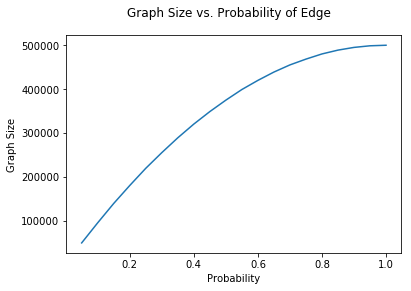

In [7]:
import random
import Graph
import matplotlib.pyplot as plt

class RandomGraph(Graph.Graph):

    def add_random_edges(self, p=0.05):
        #Starts with an edgeless graph and adds edges at random, with a probability of p for any edge between two nodes to exist
        for v in self.keys():
            for w in self.keys():
                #Add edge between two nodes with probability p (if they're different nodes)
                if(v == w):
                    continue;
                if(random.random() <= p):
                    self.add_edge(Graph.Edge(v,w))
                    
probVals = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
numEdges = []
for prob in probVals:
    rng = RandomGraph()
    for i in range(1,1001):
        v = Graph.Vertex(str(i))
        rng.add_vertex(v)
    rng.add_random_edges(prob)
    numEdges.append(len(rng.edges()))
fig = plt.figure()
plt.plot(probVals,numEdges)
fig.suptitle('Graph Size vs. Probability of Edge')
plt.ylabel('Graph Size')
plt.xlabel('Probability')
plt.show()

The plot above depicts how the number of edges in a randomly generated graph changes with the probability *p* of there being an edge between any two nodes. The random graphs are all generated using the previously described *Erdos-Renyi* model of random graph generation. As expected, the number of edges increases with the probability, although the speed of ascent slows somewhat as the probability starts to reach high values.

## Connectedness
A graph is connected if any node in the graph can be reached from any other node. 

Connectedness can be tested for using a simple breadth-first search:
1. Start a BFS at any node in the graph
2. Continue to search through the graph until there are no more new vertices to discover
3. Check to see whether all of the graph's vertices have been discovered. If they have, the graph is connected.

Using the *Erdos-Renyi* model of random graph generation, one interesting test to perform is that of observing how the chance of a random graph being connected increases as the probability *p* (of an edge between any two nodes) increases. The results of such a test are generated and shown below:

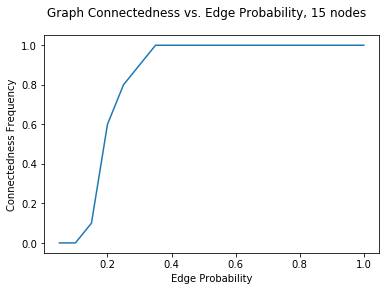

In [8]:
import RandomGraph
import Graph
import Gen
import matplotlib.pyplot as plt
import numpy

probVals = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
results = [[0 for x in range(20)] for y in range(20)]

#Run simulation on 20 values of n, ranging from 5 to 100 in increments of 5
for i in range(1,21):
    #Test probability from 5% to 100%, in increments of 5
    for k in range(1,21):
        #Record frequency of connectedness
        freq = 0
        #Run 10 simulations for this combination of nodes and probability
        for sim in range(10):
            #Number of nodes
            n = 5 * i
            #Create graph and generator
            gen = Gen.genAlphaNum()
            g = RandomGraph.RandomGraph()
            #Add all vertices to graph
            for j in range(n):
                c = next(gen)
                g.add_vertex(Graph.Vertex(c))
            #Add edges randomly
            g.add_random_edges(float(k*0.05))
            #Test connectedness of graph
            if(g.is_connected()):
                freq += 1
        #Compute frequency as percentage and store
        results[i-1][k-1] = float(float(freq)/float(10))
        
#Plot results
fig = plt.figure()
plt.plot(probVals,results[2])
fig.suptitle('Graph Connectedness vs. Edge Probability, 15 nodes')
plt.ylabel('Connectedness Frequency')
plt.xlabel('Edge Probability')
plt.show()

The simulation above uses the *Erdos_Renyi* model of graph generation to perform a number of tests. The simulation runs as follows:
1. Generate a graph containing some number of nodes, and no edges
2. Starting with some probability *p* (of there being an edge between any two nodes), use the *Erdos-Renyi* model to randomly add edges to the graph
3. Repeat *steps 1-2* 10 times (to generate 10 different graphs). Test each graph for connectedness, and record the connectedness frequency (i.e. how many of the 10 graphs were connected)

This basic experiment is conducted for a combination of graph sizes and probability values. The above simulation runs the experiment for every graph size between 5 and 100 (with intervals of 5). For each graph size, the experiment is conducted for every probability value between 0.05 and 1.0 (with intervals of 0.05).

The plot shows the simulation results for a graph size of 15 (i.e. 15 nodes). What it shows is how the frequency of connectedness changes as the edge probability *p* increases. As expected, as *p* increases, the frequency increases as well (i.e. as *p* increases, a larger number of the 10 generated graphs are connected). 

What is interesting to observe, however, is the sudden transition between low frequencies of connectedness and high frequencies of connectedness. Observing the graph suggests that there is a certain value of *p* that acts as a threshold, or critical value, where the graphs suddenly become substantially more likely to be connected. There doesn't seem to be a gradual increase in the chance of a graph being connected as *p* increases. Rather, above a certain value of *p*, connectedness suddenly becomes much more likely. This bears some similarity to certain physical systems, where the nature of the system can change abruptly when some factor (such as temperature) crosses a threshold, or critical value.

Another interesting observation is that the value of this *threshold probability* seems to change as the graph size (number of nodes) changes. A simulation depicting this relationship is performed and displayed below:

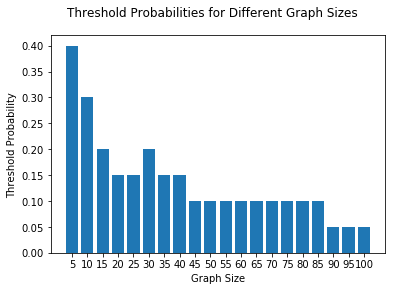

In [2]:
import RandomGraph
import Graph
import Gen
import matplotlib.pyplot as plt
import numpy

probVals = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
results = [[0 for x in range(20)] for y in range(20)]

#Run simulation on 20 values of n, ranging from 5 to 100 in increments of 5
for i in range(1,21):
    #Test probability from 5% to 100%, in increments of 5
    for k in range(1,21):
        #Record frequency of connectedness
        freq = 0
        #Run 10 simulations for this combination of nodes and probability
        for sim in range(10):
            #Number of nodes
            n = 5 * i
            #Create graph and generator
            gen = Gen.genAlphaNum()
            g = RandomGraph.RandomGraph()
            #Add all vertices to graph
            for j in range(n):
                c = next(gen)
                g.add_vertex(Graph.Vertex(c))
            #Add edges randomly
            g.add_random_edges(float(k*0.05))
            #Test connectedness of graph
            if(g.is_connected()):
                freq += 1
        #Compute frequency as percentage and store
        results[i-1][k-1] = float(float(freq)/float(10))

#Find the probability value for each graph size at which the graphs are connected more than 50% of the time
thresholdProbs = []
for i in range(20):
    thresholdProb = 1.0
    for j in range(20):
        if(results[i][j] >= 0.5):
            thresholdProb = float((j+1) * 0.05);
            break;
    thresholdProbs.append(thresholdProb)
        
#Plot results
numNodes = ['5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80', '85', '90', '95', '100']
fig = plt.figure()
y_pos = numpy.arange(len(numNodes))
fig.suptitle('Threshold Probabilities for Different Graph Sizes')
plt.bar(y_pos, thresholdProbs, align='center')
plt.xticks(y_pos, numNodes)
plt.ylabel('Threshold Probability')
plt.xlabel('Graph Size')
plt.show()

The threshold probabilities in this experiment were calculated by taking the probability (for each graph size) above which 50% of the graphs generated were connected. 

As can be seen, increasing the number of nodes seems to decrease the threshold probability of the graph. So as a graph becomes larger, a smaller *p* value is needed (during random edge generation) for the graph to become connected.

# Investigation: Word Chess
A novel example of a problem well-suited to graphs and graph algorithms is a game called *word chess*. The goal of this game is to start with one word (let's call it a *source* word), and move from that first word to a *goal* word, by making one letter modifications at each step. Each intermediate word must also be a valid English word. 

This problem can be solved simplistically using graph algorithms. 
- Each word in the English dictionary is represented as a node
- Every pair of words that are one letter apart have an edge between them

Using this setup, the problem is then reduced down to a simple shortest-path problem. By starting with at the *source*, the problem simply becomes that of finding a shortest-path to the *goal*. Well known algorithms, such as Dijkstra's algorithm, or A\*, can be used to accomplish this.

Below is an interactive demonstration of this application:

Enter a 4-letter word (the source word): help
Enter a 4-letter word (the destination word): save


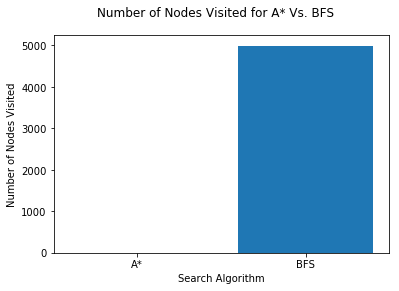

Solutions:
('A*', ['help', 'hele', 'hale', 'have', 'save'])
('BFS', ['help', 'hele', 'sele', 'sale', 'save'])


In [8]:
import Graph
import heapq
import time
from collections import deque
import matplotlib.pyplot as plt
import numpy

def aStar(g, source, goal, heur):
    #Use A* algorithm to complete word search
    numVisited = 0
    #Set up dictionary of visited nodes, previous node, and distances
    visited = {}
    distances = {}
    prev = {}
    seen = {}
    for key in g:
        visited[key] = False
        distances[key] = 1000000
        prev[key] = None
        seen[key] = False
    #Set up priority queue for algorithm
    q = []
    #Push source node onto pq
    heapq.heappush(q, (heur[source], source))
    distances[source] = 0
    seen[source] = True
    #Search for dest
    while(len(q)!=0 and not visited[goal]):
        #Pop minimum weight item of pq (weight uses heuristic)
        curNodeInfo = heapq.heappop(q)
        curNode = curNodeInfo[1]
        numVisited = numVisited+1
        #Search all adjacent nodes
        neighbours = g.out_vertices(curNode)
        for neighbour in neighbours:
            if(visited[neighbour] == False and seen[neighbour] == False):
                #Add them to pq if they're univisited and not already in the pq
                distToAdj = distances[curNode] + 1
                distances[neighbour] = distToAdj
                heapq.heappush(q, ((heur[neighbour]+distToAdj), neighbour))
                seen[neighbour] = True
                prev[neighbour] = curNode #Record their parent
        #Mark node as visited
        visited[curNode] = True

    #Determine the path to the goal node (start at goal and trace back parents to source)
    if(visited[goal]):
        path = []
        path.append(goal)
        parent = prev[goal]
        while(parent != None):
            path.append(parent)
            parent = prev[parent]
        #Reverse the order and return (since path is calculated backwards)
        pathProperOrder = []
        for i in range(len(path)-1, -1,-1):
            pathProperOrder.append(path[i])
        return (pathProperOrder, numVisited)

    else:
        #Goal can't be reached from the specified source
        return (None,len(visited))


def BFS(g, source, goal):
    #Use BFS to find solution to word chess
    numVisited = 0
    #Set up visited and previous dictionaries
    visited = {}
    prev = {}
    for key in g:
        visited[key] = False
        prev[key] = None
    #Set up queue
    q = deque([source])
    #Search graph
    while(len(q)!=0 and not visited[goal]):
        #Pop head of queue
        curNode = q.popleft()
        #Mark node as visited
        visited[curNode] = True
        numVisited = numVisited + 1
        #Search all adjacent nodes
        neighbours = g.out_vertices(curNode)
        for neighbour in neighbours:
            if(visited[neighbour] == False and not (neighbour in q)):
                #Add neighbour to q if it's unvisited, and not already in q
                q.append(neighbour)
                prev[neighbour] = curNode

    #Determine path from source to goal (start at goal and trace back parents to source)
    if(visited[goal]):
        path = []
        path.append(goal)
        parent = prev[goal]
        while(parent != None):
            path.append(parent)
            parent = prev[parent]
        #Invert order of path and return (since path is calculated backwards)
        pathProperOrder = []
        for i in range(len(path)-1, -1,-1):
            pathProperOrder.append(path[i])
        return (pathProperOrder, len(visited))
    else:
        return (None,len(visited))

def readWords(filename, wordLen):
    fin = open(filename)
    words = []
    for line in fin:
        line = line.rstrip()
        line = line.lower()
        if(len(line) == wordLen):
            words.append(line)
    return words

def wordDiff(w1, w2):
    diff = 0
    for i in range(len(w1)):
        if(w1[i] != w2[i]):
            diff = diff+1
    return diff

def constructGraph(words):
    #Given a list of words, constructs a graph out of them. Edge between every pair of words that are one letter apart
    g = Graph.Graph()
    for word in words:
        g.add_vertex(word)
    for i in range(len(words)):
        for j in range(i+1,len(words)):
            if(wordDiff(words[i], words[j]) == 1):
                e = Graph.Edge(words[i], words[j])
                g.add_edge(e)
    return g

def calcHeuristic(g, dest):
    #Calculates heuristics for A* algorithm
    heur = {}
    for key in g:
        heur[key] = wordDiff(key, dest)
    return heur

def wordSearch(source, dest, wordLen):
    #Read all words in from dictionary
    words = readWords('words', wordLen)

    #Construct graph out of words
    g = constructGraph(words)

    #Calculate shortest path using BFS
    start = time.time()
    (pathB, numNodesDiscoveredB) = BFS(g, source, dest)
    end = time.time()
    bfsTime = end-start

    #Calculate heuristics for A* algorithm
    heur = calcHeuristic(g, dest)

    #Calculate shortest path using A*
    start = time.time()
    (pathA, numNodesDiscoveredA) = aStar(g, source, dest, heur)
    end = time.time()
    aTime = end-start

    #Return paths, number of nodes visited, and time taken by each algorithm
    return (pathA, pathB, numNodesDiscoveredA, numNodesDiscoveredB, aTime, bfsTime)

source = raw_input("Enter a 4-letter word (the source word): ")
dest = raw_input("Enter a 4-letter word (the destination word): ")
sols = wordSearch(source, dest, 4)

#Plot results
names = ['A*', 'BFS']
numNodes = [sols[2], sols[3]]
fig = plt.figure()
y_pos = numpy.arange(len(names))
fig.suptitle('Number of Nodes Visited for A* Vs. BFS')
plt.bar(y_pos, numNodes, align='center')
plt.xticks(y_pos, names)
plt.ylabel('Number of Nodes Visited')
plt.xlabel('Search Algorithm')
plt.show()

print('Solutions:')
print('A*', sols[0])
print('BFS', sols[1])

The above program takes as input (from the user) the source and destination words. For efficiency purposes, only 4 letter words should be used (setting up the graph for 5 letter words simply takes too long). It then sets up a graph, adding a vertex for each 4 letter word in the dictionary, and an edge between words that have only 1 letter of difference.

Following this, two different pathfinding algorithms are used to solve the problem, and find a path from the source word to the destination word. The first algorithm is a regular *BFS (breadth-first search)*, and the second is a shortest path algorithm called *A\**.

As can be seen by the above plot, *A\** runs significantly faster than a regular BFS, as it is guided by a heuristic during the search, and thus visits far less nodes when exploring the graph.